# Additional plots regarding the model configuration

In [1]:
###### algunas cosas cambian si pongo como comentarios en el import de geoviews y hvplot (liberias conflictivas?)

import logging
import os

import pypsa
import yaml
import pandas as pd
import geopandas as gpd
#import geoviews as gv
#import hvplot.pandas 
import numpy as np
import scipy as sp
import networkx as nx

# plotting stuff
import matplotlib.pyplot as plt

plt.style.use("bmh")
import seaborn as sns  ###
import cartopy.crs as ccrs

sns.set(style="darkgrid")

from scipy.sparse import csgraph
from itertools import product

from shapely.geometry import Point, LineString
import shapely, shapely.prepared, shapely.wkt

logger = logging.getLogger(__name__)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 70)

import sys

sys.path.append("../")  # to import helpers
from scripts._helpers import sets_path_to_root

sets_path_to_root("pypsa-earth")

max_node_size = 1.0  # maximum size of a node for plotting purposes [used in plots]

This is the repository path:  c:\Users\Lenovo\Desktop\pypsa-earth
Had to go 1 folder(s) up.


In [2]:
# utility function for nice plotting

def normalize_node_size(values, max_node_size=max_node_size):
    return values / values.max() * max_node_size

## Load all networks

In [3]:
# add_electricity_network = os.getcwd() + '/networks/elec.nc'
# n_add_el = pypsa.Network(add_electricity_network)

# clustered_network = os.getcwd() + '/networks/elec_s_20.nc'
# n_cluster = pypsa.Network(clustered_network)



#Se carga el documento (o la direccion/path del mismo) a una variable (solved_network)

solved_network = os.getcwd() + "/results/networks/elec_s_4_ec_lcopt_Co2L-1H.nc"

base_network= os.getcwd() +  "/networks/base.nc"

#Se cargan los resultados de la optimizacion del problema segun las caracteristicas definidas para el modelo en n_solve con la funcion (operador?) Network de pypsa

n_base= pypsa.Network(base_network)

n_solve = pypsa.Network(solved_network)

INFO:pypsa.io:Imported network base.nc has buses, lines, transformers
INFO:pypsa.io:Imported network elec_s_4_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


## Zones defined by aggregated clusters

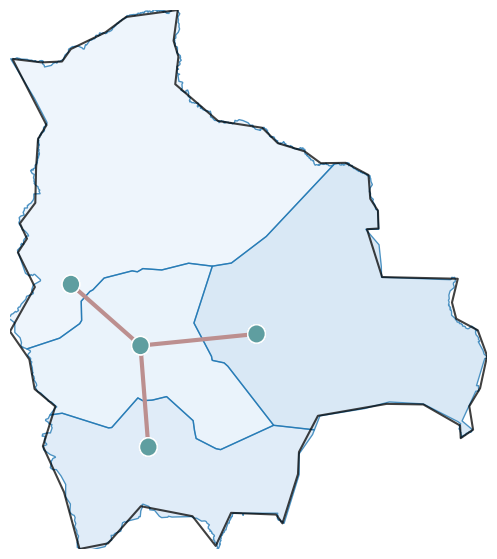

In [4]:
n = n_solve
c=4

fig, ax = plt.subplots(figsize=(7, 7),subplot_kw={'projection': ccrs.PlateCarree()})

cmap = "Blues"  # colormap for upper technology
red_linewidth = 3
red_bussizes = 5e-2
plot_capfacs = (
    "onwind"  # colors in the back represent capacity factors for this technology
)


#determine the limits of the country
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")
country=shapes

r = gpd.read_file(
        f"resources/bus_regions/regions_onshore_elec_s_4.geojson"
    ).set_index("name")
factor = n.generators_t.p_max_pu.filter(like=plot_capfacs).mean()
factor.index = [idx.split(f" {plot_capfacs}")[0] for idx in factor.index]
r["factor"] = factor
    
n.plot(
        color_geomap=False,
        bus_sizes=red_bussizes,
        line_widths=red_linewidth,
        ax=ax,
    )

r.boundary.plot(ax=ax, color="tab:blue", linewidth=1, alpha=0.8)
r.plot(ax=ax, column="factor", cmap=cmap, alpha=1, vmin=0, vmax=1)
country.boundary.plot(ax=ax, color="black", alpha=0.75)
ax.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())


# save the plot
#image_format = 'eps' # e.g .png, .svg, etc.
#fig.savefig('4zones_division_network.eps', format=image_format, dpi=1200)
plt.show()

## Voroni cells created by the initial set of buses

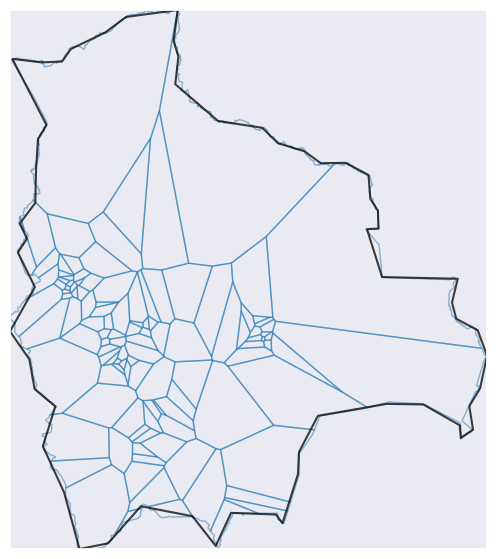

In [5]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
country=world[world.name.isin(["Bolivia"])].set_index("name")
shapes=country

fig, ax = plt.subplots(figsize=(7, 7),subplot_kw={'projection': ccrs.PlateCarree()})

r = gpd.read_file(
        f"resources/bus_regions/regions_onshore.geojson"
    ).set_index("name")


r.boundary.plot(ax=ax, color="tab:blue", linewidth=1, alpha=0.5)
country.boundary.plot(ax=ax, color="black", alpha=0.75)
ax.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# save the plot
#image_format = 'eps' # e.g .png, .svg, etc.
#fig.savefig('limits_hydro.eps', format=image_format, dpi=1200)

plt.show()

## Network comparison

INFO:pypsa.io:Imported network elec_s_4_ec_lcopt_Co2L-4H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_4_ec_lcopt_Co2L-4H.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores
INFO:pypsa.io:Imported network elec_s_4_ec_lcopt_Co2L-4H.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores
c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


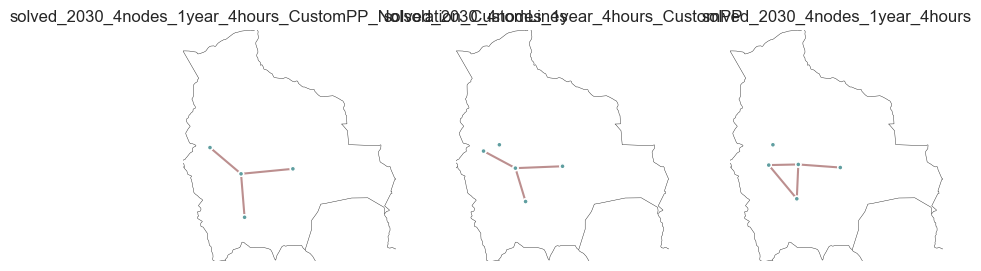

In [6]:
import matplotlib.pyplot as plt
import pypsa
import numpy as np
import cartopy.crs as ccrs

solved_final = os.getcwd() +  "/Result_analysis/2030_4N_1Y_4H_CPP_NIS_CL/networks/elec_s_4_ec_lcopt_Co2L-4H.nc"
n_solved_2030_4nodes_1year_4hours_CustomPP_NoIsolation_CustomLines = pypsa.Network(solved_final)

solved_mid = os.getcwd() +  "/Result_analysis/2030_BO_4Nodes_1year_4hours_NoCustomPP/networks/elec_s_4_ec_lcopt_Co2L-4H.nc"
n_solved_2030_4nodes_1year_4hours_CustomPP = pypsa.Network(solved_mid)

solved_base = os.getcwd() +  "/Result_analysis/2030_BO_4Nodes_1year_4hours_WithCustomPP/networks/elec_s_4_ec_lcopt_Co2L-4H.nc"
n_solved_2030_4nodes_1year_4hours = pypsa.Network(solved_base)

#determine the limits of the country
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

# create a subplot with 1 row and 2 columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3),subplot_kw={'projection': ccrs.PlateCarree()})
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot your network in the first subplot
n_solved_2030_4nodes_1year_4hours_CustomPP_NoIsolation_CustomLines.plot(ax=ax1,margin=0.5)
ax1.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# hide the background map
#ax1.background_patch.set_visible(False)

# show an image in the second subplot
n_solved_2030_4nodes_1year_4hours_CustomPP.plot(ax=ax2)
ax2.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

n_solved_2030_4nodes_1year_4hours.plot(ax=ax3)
ax3.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# optionally, add titles to your subplots
ax1.set_title('solved_2030_4nodes_1year_4hours_CustomPP_NoIsolation_CustomLines')
ax2.set_title('solved_2030_4nodes_1year_4hours_CustomPP')
ax3.set_title('solved_2030_4nodes_1year_4hours')


# show the subplots
# plt.savefig('clustered_comparison.png')
plt.show()

## Outputs from build_renewable_profiles

In [7]:
import os
import sys

if not os.path.isdir("pypsa-earth"):
    os.chdir("../..")
sys.path.append(os.getcwd()+"/pypsa-earth/scripts")

In [8]:
import atlite
import cartopy.crs as ccrs
import cartopy
import xarray as xr
import geopandas as gpd

# import holoviews as hv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import pypsa
import shutil
from rasterio.plot import show
from atlite.gis import shape_availability, ExclusionContainer

import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) # Ignore Shapely warnings

plt.rcParams["figure.figsize"] = [7, 7]
%matplotlib inline

In [9]:
solar_path = "C:/Users/Lenovo/Desktop/pypsa-earth/resources/renewable_profiles/profile_solar.nc"

# solar_path = os.path.realpath("pypsa-earth") + "/resources/renewable_profiles/profile_solar.nc"
solar = xr.open_dataset(solar_path)

wind_path = "C:/Users/Lenovo/Desktop/pypsa-earth/resources/renewable_profiles/profile_onwind.nc"

# wind_path = os.path.realpath("pypsa-earth") + "/resources/renewable_profiles/profile_onwind.nc"
wind = xr.open_dataset(wind_path)
wind

<xarray.Dataset>
Dimensions:           (time: 8760, bus: 115, y: 46, x: 43)
Coordinates:
  * time              (time) datetime64[ns] 2013-01-01 ... 2013-12-31T23:00:00
  * bus               (bus) object '0' '1' '4' '6' ... '151' '152' '153' '154'
  * y                 (y) float64 -23.1 -22.8 -22.5 -22.2 ... -10.2 -9.9 -9.6
  * x                 (x) float64 -69.9 -69.6 -69.3 -69.0 ... -57.9 -57.6 -57.3
Data variables:
    profile           (time, bus) float64 ...
    weight            (bus) float64 ...
    p_nom_max         (bus) float64 ...
    potential         (y, x) float64 ...
    average_distance  (bus) float64 ...

In [10]:
def plot_raster(
    data,
    region,
    cmap="Blues",
    figsize=(10, 10),
    projection=ccrs.PlateCarree(),
    cb_label="potential",
    gridlabels=False,
    title="title",
    filename=None,
    format="pdf",
):
    # beauty therapy for plots
    font_scale = figsize[0] / 10  # according to width
    plt.rcParams.update({"font.size": 17 * font_scale})
    fig, ax = plt.subplots(figsize=figsize, subplot_kw={"projection": projection})

    # onshore potential raster
    (data / 1000).plot(
        ax=ax,
        cmap=cmap,
        edgecolor="grey",
        linestyle=":",
        add_colorbar=True,
        cbar_kwargs={"shrink": 1, "label": cb_label},
    )

    # black edge around country or continent shape
    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    shapes_country = world[world.name.isin(region)]
    shapes_continent = world[world.continent.isin(region)]
    shapes = pd.concat([shapes_country, shapes_continent])
    shapes.plot(ax=ax, edgecolor="k", color="None")

    # set extent
    buffer = 0.5
    minx, miny, maxx, maxy = (shapes.to_crs(ccrs.PlateCarree()).bounds).values.flatten()
    minx, miny = [minx - buffer, miny - buffer]
    maxx, maxy = [maxx + buffer, maxy + buffer]
    ax.set_extent([minx, maxx, miny, maxy], crs=ccrs.PlateCarree())  # Nigeria
    #  ax.set_extent([-23, 55, -35, 40], crs=ccrs.PlateCarree())  #  Africa

    if gridlabels == True:
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
        gl.top_labels = False
        gl.right_labels = False
        gl.xlines = False
        gl.ylines = False
        gl.xlabel_style = {"size": 12 * font_scale}
        gl.ylabel_style = {"size": 12 * font_scale}

    if title is not None:
        plt.title(title)

    if filename is not None:
        plt.savefig(filename, bbox_inches="tight")

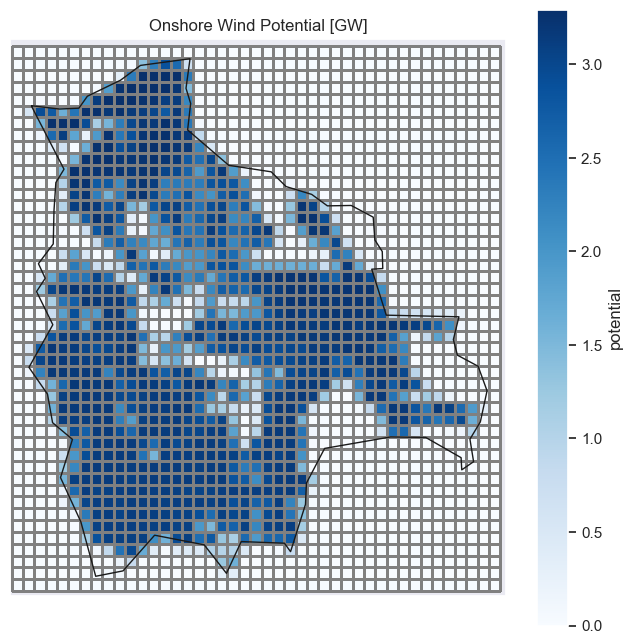

In [11]:
plot_raster(
    wind.potential,
    ["Bolivia"],
    cmap="Blues",
    figsize=(8,8),
    projection=ccrs.PlateCarree(),
    cb_label="potential",
    gridlabels=False,
    title="Onshore Wind Potential [GW]",
    # filename="rasterized-onshore-wind-potential.pdf"
)

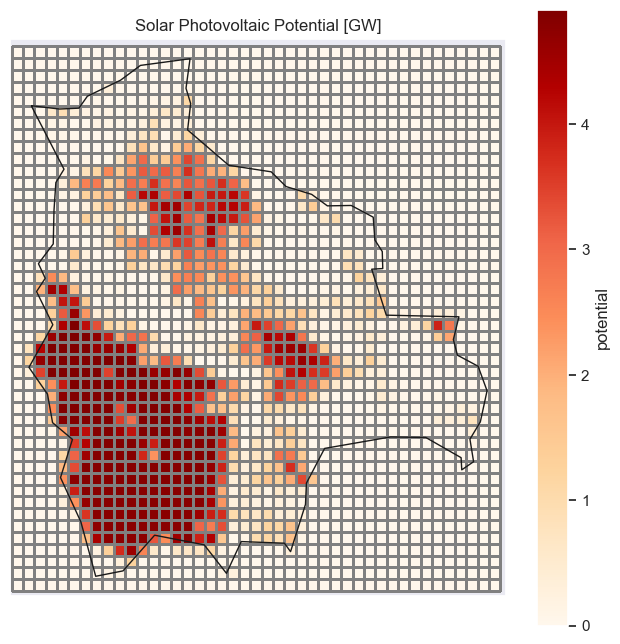

In [12]:
plot_raster(
    solar.potential,
    ["Bolivia"],
    cmap="OrRd",
    figsize=(8, 8),
    projection=ccrs.PlateCarree(),
    cb_label="potential",
    gridlabels=False,
    title="Solar Photovoltaic Potential [GW]",
    # filename="rasterized-solvar-pv-potential.pdf"
)

### Technical installable potential in bus regions. Provided by Fabian Neumann

In [13]:
def plot_map(data, cmap, projection, voronoi=None, title=None, filename=None):
    plt.rcParams.update({"font.size": 12})
    fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={"projection": projection})
    data.plot.imshow(
        ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, label="potential [MW]"
    )
    # contourf
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS.with_scale("110m"))
    ax.set_extent([-57.25,  -69.38, -9.40, -22.54], crs=ccrs.PlateCarree())  # Bolivia
    #  ax.set_extent([-23, 55, -35, 40], crs=ccrs.PlateCarree())  # Africa
    resource_path = os.path.realpath("desktop/pypsa-earth/resources")
    if voronoi == "onshore":
        br = gpd.read_file(f"{resource_path}/bus_regions/regions_{voronoi}.geojson")
        br.plot(
            ax=ax,
            transform=ccrs.PlateCarree(),
            facecolor="none",
            linewidth=0.25,
            edgecolor="k",
        )
    elif voronoi == "offshore":
        br = gpd.read_file(f"{resource_path}/bus_regions/regions_{voronoi}.geojson")
        br.plot(
            ax=ax,
            transform=ccrs.PlateCarree(),
            facecolor="none",
            linewidth=0.25,
            edgecolor="k",
        )

    if title is not None:
        plt.title(title)

    if filename is not None:
        plt.savefig(filename, bbox_inches="tight")

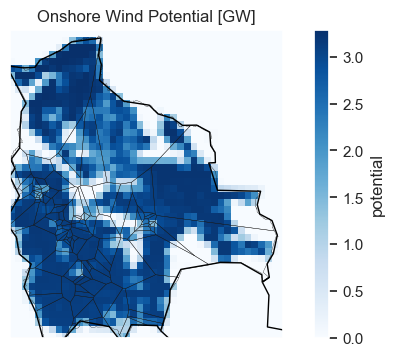

In [14]:
plot_map(
    wind.potential / 1000,
    "Blues",
    #ccrs.Orthographic(),    
    ccrs.PlateCarree(),
    voronoi="onshore",
    title="Onshore Wind Potential [GW]",
    # filename="onwind-gridcell.pdf",
)

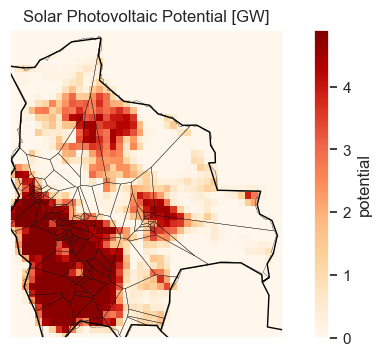

In [15]:
plot_map(
    solar.potential / 1000,
    "OrRd",
    #ccrs.Orthographic(),    
    ccrs.PlateCarree(),
    voronoi="onshore",
    title="Solar Photovoltaic Potential [GW]",
    # filename="solar-gridcell.pdf",
)

In [16]:
resource_path = os.path.realpath("desktop/pypsa-earth/resources")
network_path = os.path.realpath("desktop/pypsa-earth/networks")
br = gpd.read_file(f"{resource_path}/bus_regions/regions_onshore.geojson")
elec = pypsa.Network(f"{network_path}/elec.nc")

INFO:pypsa.io:Imported network elec.nc has buses, carriers, generators, lines, loads, storage_units, transformers


In [17]:
def plot_voronoi(n, carrier, voronoi, cmap, projection, title=None, filename=None):

    g = n.generators.loc[n.generators.carrier == carrier]
    br = gpd.read_file(f"desktop/pypsa-earth/resources/bus_regions/regions_{voronoi}.geojson").set_index("name")
    br_area = br.to_crs("ESRI:54009")
    br_area = br_area.geometry.area * 1e-6
    br["p_nom_max"] = g.groupby("bus").sum().p_nom_max / br_area

    fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={"projection": projection})
    plt.rcParams.update({"font.size": 10})
    br.plot(
        ax=ax,
        column="p_nom_max",
        transform=ccrs.PlateCarree(),
        linewidth=0.25,
        edgecolor="k",
        cmap=cmap,
        vmin=0,
        vmax=br["p_nom_max"].max(),
        legend=True,
        legend_kwds={"label": r"potential density"},
    )
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS.with_scale("110m"))
    ax.set_extent([-57.25,  -69.38, -9.40, -22.54], crs=ccrs.PlateCarree())  # Bolivia
    #  ax.set_extent([-23, 55, -35, 40], crs=ccrs.PlateCarree())  # Africa

    if title is not None:
        plt.title(title)

    if filename is not None:
        plt.savefig(filename, bbox_inches="tight")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23648\1656925478.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  br["p_nom_max"] = g.groupby("bus").sum().p_nom_max / br_area


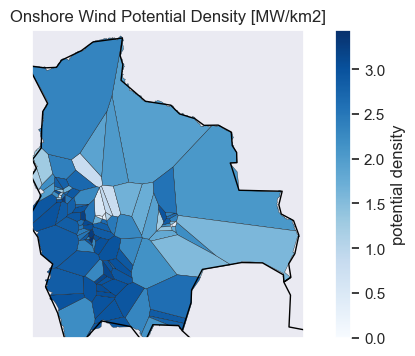

In [18]:
plot_voronoi(
    elec,
    "onwind",
    "onshore",
    "Blues",
    #ccrs.Orthographic(),    
    ccrs.PlateCarree(),
    title="Onshore Wind Potential Density [MW/km2]",
    # filename="onwind-cell.pdf",
)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23648\1656925478.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  br["p_nom_max"] = g.groupby("bus").sum().p_nom_max / br_area


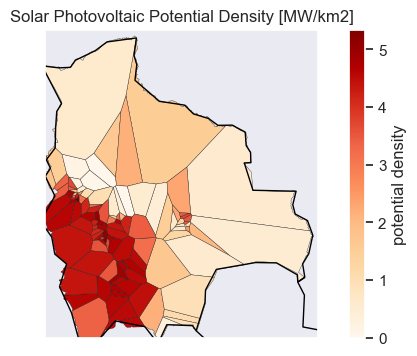

In [19]:
plot_voronoi(
    elec,
    "solar",
    "onshore",
    "OrRd",
    #ccrs.Orthographic(),    
    ccrs.PlateCarree(),
    title="Solar Photovoltaic Potential Density [MW/km2]",
    # filename="solar-cell.pdf",
)

### Technical 'resource' energy potential [TWh]

In [20]:
technical_solar_potential_twh = (
    sum(solar["p_nom_max"] * solar["profile"]).sum() / 10**6
)  # MWh to TWH conversion
technical_wind_potential_twh = (
    sum(wind["p_nom_max"] * wind["profile"]).sum() / 10**6
)  # MWh to TWH conversion

print(
    f"Technical solar potential: {technical_solar_potential_twh.values} \n",
    f"Technical wind potential: {technical_wind_potential_twh.values}",
)

Technical solar potential: 2900.0197700244316 
 Technical wind potential: 1619.2753697542657


### Timeseries

Text(0.5, 1.0, '')

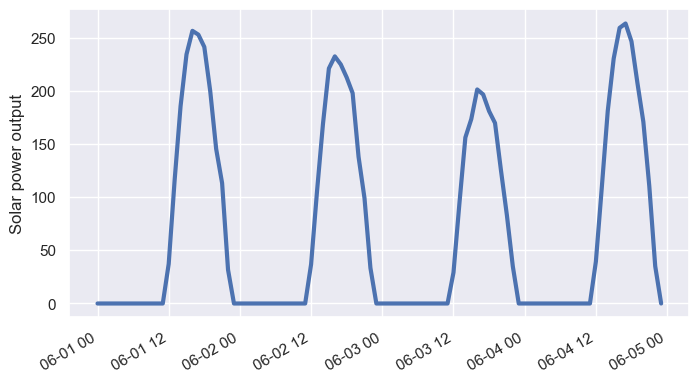

In [21]:
plt.rcParams.update({"font.size": 15})
fig, ax = plt.subplots(figsize=(8, 4))

# max_installable_capacity [MX] * profiles [p.u.]
solar_profile_mw = solar["p_nom_max"] * solar["profile"]

solar_profile_mw.sel(bus="0", time=slice("2013-06-01", "2013-06-04")).plot(
    ax=ax, linewidth=3
)
ax.set_xlabel(None)
ax.set_ylabel("Solar power output")
ax.set_title(None)

# plt.savefig("solar-power-profile.pdf", bbox_inches="tight")

Text(0.5, 1.0, '')

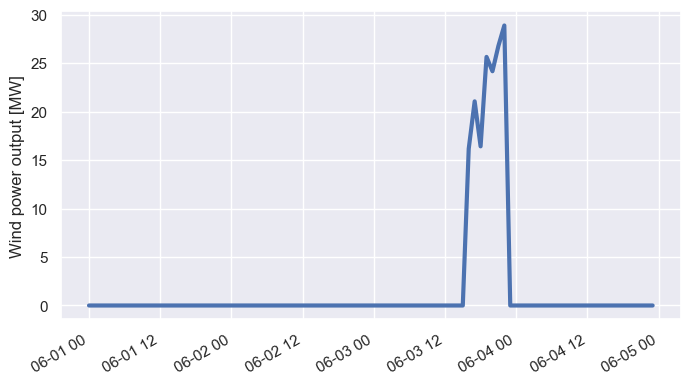

In [22]:
plt.rcParams.update({"font.size": 15})
fig, ax = plt.subplots(figsize=(8, 4))

# max_installable_capacity [MX] * profiles [p.u.]
wind_profile_mw = wind["p_nom_max"] * wind["profile"]

wind_profile_mw.sel(bus="0", time=slice("2013-06-01", "2013-06-04")).plot(
    ax=ax, linewidth=3
)
ax.set_xlabel(None)
ax.set_ylabel("Wind power output [MW]")
ax.set_title(None)

# plt.savefig("onshore-wind-power-profile.pdf", bbox_inches="tight")

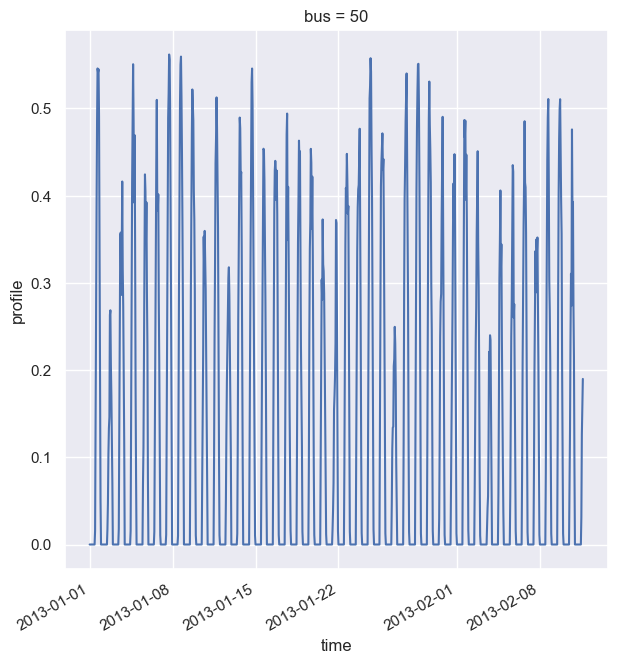

In [23]:
plt.rcParams.update({"font.size": 10})
solar["profile"].isel(bus=sum(range(8)), time=range(0, 1000)).plot()